<a href="https://colab.research.google.com/github/202311003/idm_assignment_2/blob/202311062/DM_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
-!mkdir data

In [ ]:
!unzip data/archive.zip -d data/

Archive:  data/archive.zip
  inflating: data/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv  


In [ ]:
!head -2 data/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv

index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Length of Stay,Type of Admission,Patient Disposition,Discharge Year,CCS Diagnosis Code,CCS Diagnosis Description,CCS Procedure Code,CCS Procedure Description,APR DRG Code,APR DRG Description,APR MDC Code,APR MDC Description,APR Severity of Illness Code,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,2010,135.0,INTESTINAL INFECTION,0.0,NO PROC,249,"NON-BACTERIAL GASTROENTERITIS, NAUSEA & VOMITING",6,Diseases and Disorde

In [ ]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')
df

<ipython-input-8-191eb13e4e80>:1: DtypeWarning: Columns (1,2,7,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')


,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622128,2622128,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,230373.65,83223.46
2622129,2622129,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,N,20335.27,7677.97
2622130,2622130,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,27775.54,9819.99
2622131,2622131,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,NaN,NaN,NaN,NaN,NaN,0,Y,Y,11738.58,3295.21


In [ ]:
df.shape

(2622133, 38)

In [ ]:
df.columns

Index(['index', 'Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'Operating Certificate Number'}>,
        <Axes: title={'center': 'Facility ID'}>,
        <Axes: title={'center': 'Discharge Year'}>],
       [<Axes: title={'center': 'CCS Diagnosis Code'}>,
        <Axes: title={'center': 'CCS Procedure Code'}>,
        <Axes: title={'center': 'APR DRG Code'}>,
        <Axes: title={'center': 'APR MDC Code'}>],
       [<Axes: title={'center': 'APR Severity of Illness Code'}>,
        <Axes: title={'center': 'Attending Provider License Number'}>,
        <Axes: title={'center': 'Operating Provider License Number'}>,
        <Axes: title={'center': 'Other Provider License Number'}>],
       [<Axes: title={'center': 'Birth Weight'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Costs'}>, <Axes: >]], dtype=object)

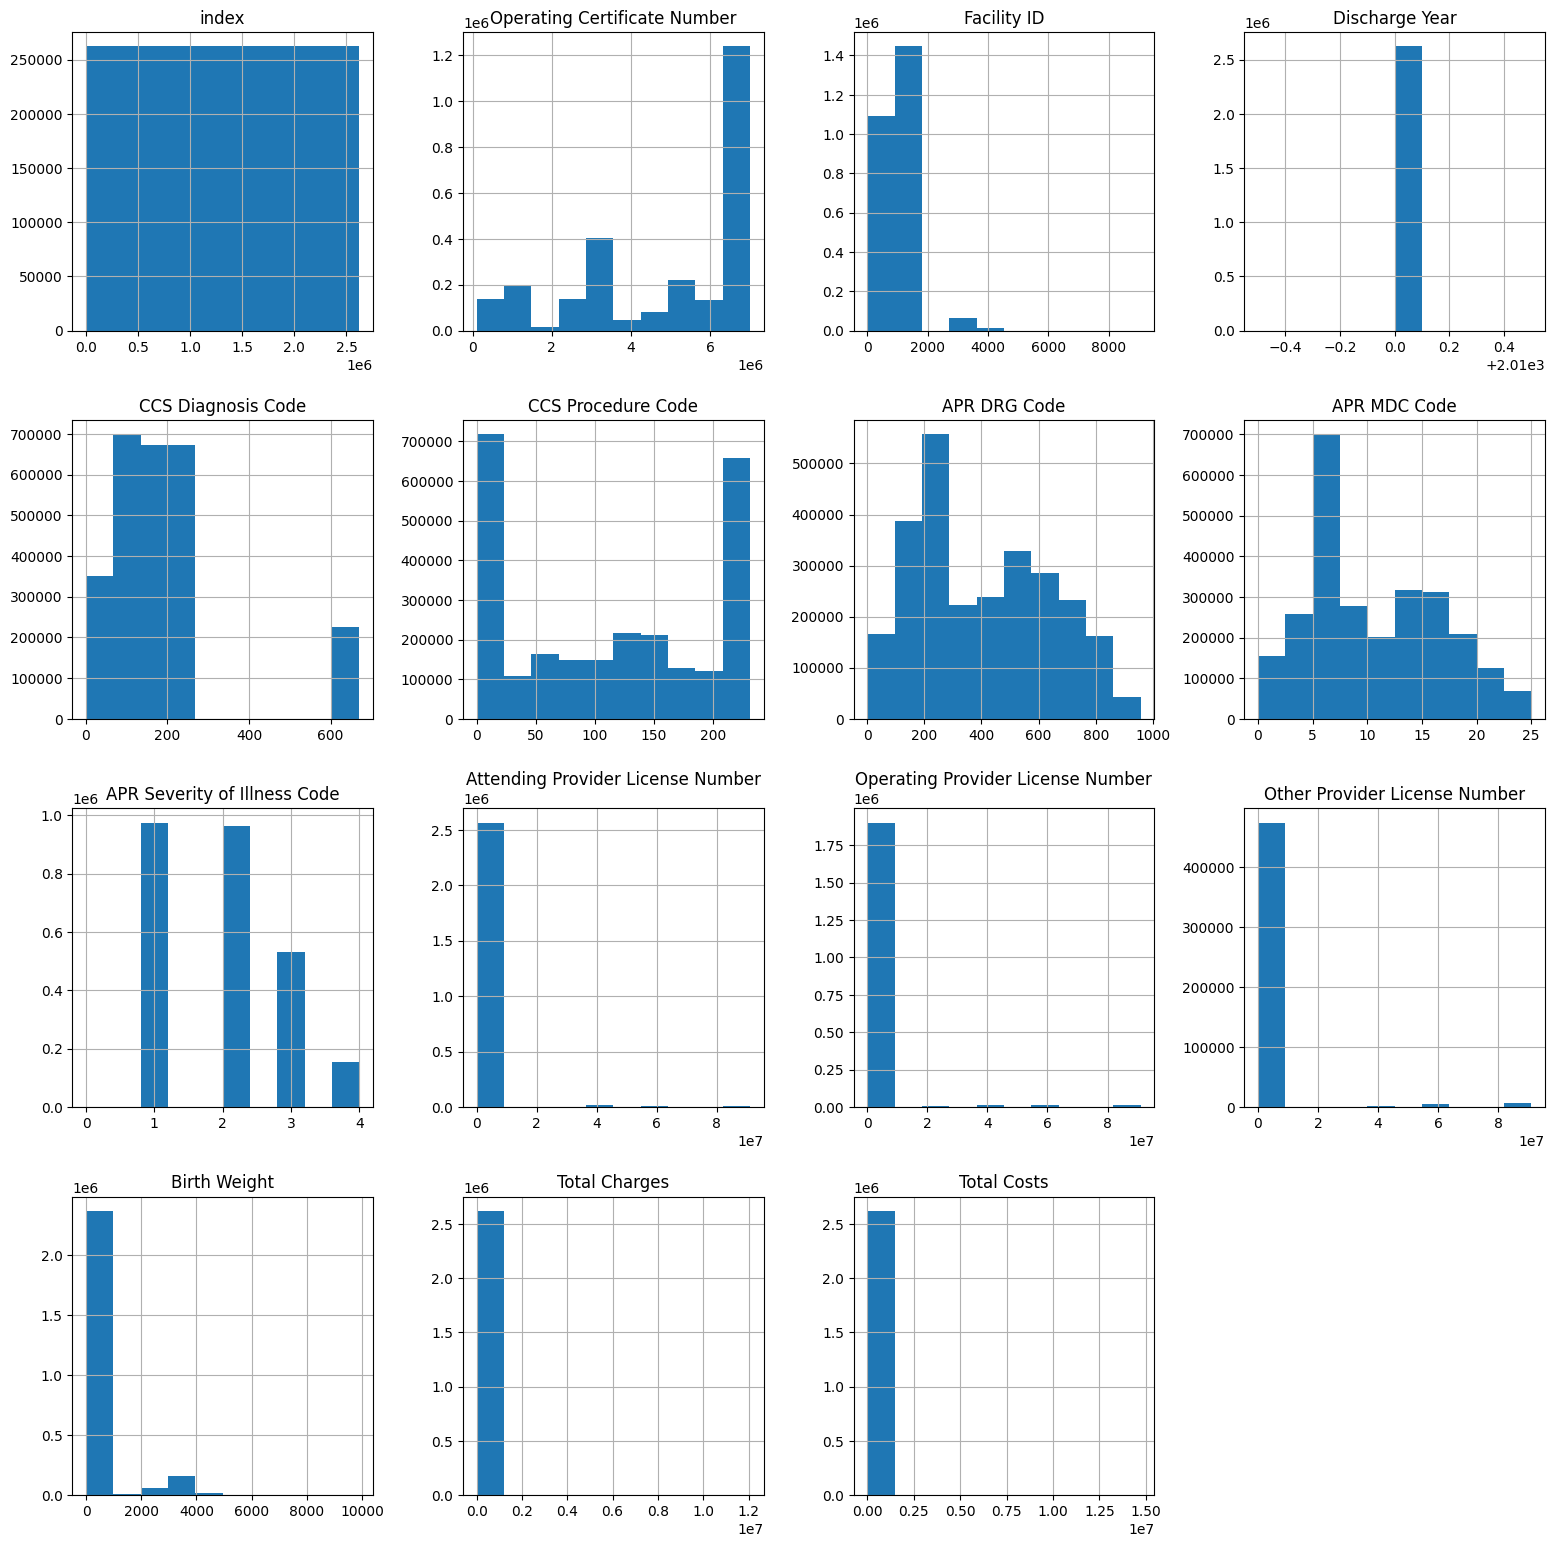

In [ ]:
df.hist(figsize=(19,19))

In [ ]:
df.isnull().sum() / len(df) *100

index                                   0.000000
Health Service Area                     0.186375
Hospital County                         0.186375
Operating Certificate Number            0.186375
Facility ID                             0.186375
Facility Name                           0.000000
Age Group                               0.000000
Zip Code - 3 digits                     0.122076
Gender                                  0.000000
Race                                    0.000000
Ethnicity                               0.000000
Length of Stay                          0.000000
Type of Admission                       0.000000
Patient Disposition                     0.003928
Discharge Year                          0.000000
CCS Diagnosis Code                      0.086685
CCS Diagnosis Description               0.086685
CCS Procedure Code                      0.086685
CCS Procedure Description               0.086685
APR DRG Code                            0.000000
APR DRG Description 

In [ ]:
np.shape(df['Hospital County'].unique())

(58,)

In [ ]:
unique_counties = df['Hospital County'].unique()
print(unique_counties)

['Albany' 'Allegany' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Suffolk' 'Essex' 'Franklin' 'Fulton' 'Genesee'
 'Herkimer' 'Jefferson' 'Lewis' 'Livingston' 'Madison' 'Monroe'
 'Montgomery' 'Nassau' 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange'
 'Orleans' 'Oswego' 'Otsego' 'Putnam' 'Rensselaer' 'Rockland'
 'St Lawrence' 'Saratoga' 'Schenectady' 'Schoharie' 'Schuyler' 'Steuben'
 'Sullivan' 'Tompkins' 'Ulster' 'Warren' 'Wayne' 'Westchester' 'Wyoming'
 'Yates' 'Bronx' 'Kings' 'Manhattan' 'Richmond' 'Queens' nan]


In [ ]:
np.shape(df['Health Service Area'].unique())

(9,)

In [ ]:
unique_service_area = df['Health Service Area'].unique()
print(unique_service_area)

['Capital/Adiron' 'Western NY' 'Southern Tier' 'Central NY' 'Finger Lakes'
 'Hudson Valley' 'Long Island' 'New York City' nan]


In [ ]:
unique_gender = df['Gender'].unique()
print(unique_gender)

['F' 'M' 'U']


In [ ]:
np.shape(df['Operating Certificate Number'].unique())

(190,)

In [ ]:
np.shape(df['Facility ID'].unique())

(226,)

In [ ]:
np.shape(df['Facility ID'].unique())

(225,)

In [ ]:
np.shape(df['Facility ID'].unique())

(226,)

In [ ]:
import re

# Function to extract numeric values from a string
def extract_numeric(value):
    numeric_part = re.search(r'\d+', str(value))  # Extract numeric part using regular expression
    if numeric_part:
        return int(numeric_part.group())  # Convert extracted numeric part to integer
    else:
        return 0  # Return 0 for non-numeric or empty values

# Apply the extract_numeric function to 'Length of Stay' column
df['Length of Stay'] = df['Length of Stay'].apply(extract_numeric).astype(int)

# Now, 'Length of Stay' column contains the extracted numeric values as integers


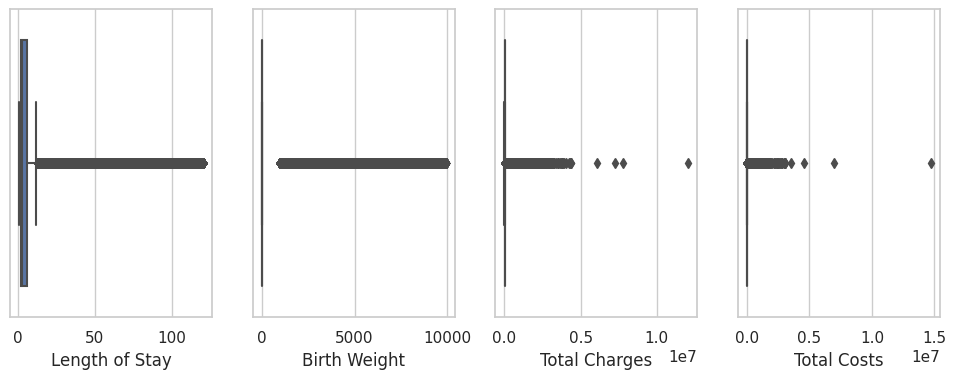

In [ ]:
#@title [Click here to see the solution.]
fig, ax = plt.subplots(1, 4, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Length of Stay" ,"Birth Weight","Total Charges","Total Costs"]):
    sns.boxplot(x=df[col], ax=ax[axid])

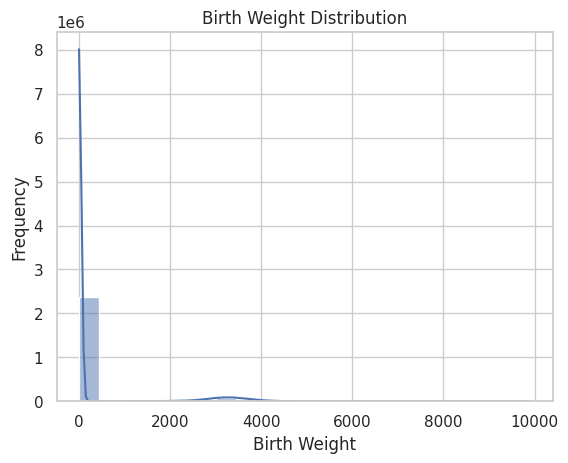

In [ ]:
import seaborn as sns
sns.histplot(df['Birth Weight'],kde = True)
plt.xlabel('Birth Weight')
plt.ylabel('Frequency')
plt.title('Birth Weight Distribution')
plt.show()

In [ ]:
# Import pandas library (if not already imported)
import pandas as pd

# Sample DataFrame with missing values
# df = ...

# List of columns where you want to fill missing values with mode
columns_to_fill = ['Health Service Area', 'Hospital County', 'Facility ID','Zip Code - 3 digits']

# Fill missing values in specified columns with their respective modes
for column in columns_to_fill:
    mode_value = df[column].mode()[0]  # Compute the mode of the column
    df[column].fillna(mode_value, inplace=True)  # Fill NaN values with the mode

# Now, missing values in specified columns are filled with their respective modes


In [ ]:
df_corr = df.corr(numeric_only='int')
df_corr

,index,Operating Certificate Number,Facility ID,Length of Stay,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs
index,1.000000,0.876344,0.906070,0.011757,NaN,0.004626,0.134145,0.040862,0.040572,-0.053251,0.000619,-0.035486,-0.080186,0.022471,0.057584,0.059875
Operating Certificate Number,0.876344,1.000000,0.747070,0.021661,NaN,0.020378,0.137547,0.045278,0.045196,-0.051154,0.012031,-0.023388,-0.066738,0.014432,0.063992,0.074170
Facility ID,0.906070,0.747070,1.000000,0.010711,NaN,0.010059,0.122176,0.047684,0.046519,-0.050739,-0.005738,-0.035690,-0.073875,0.039007,0.044555,0.050366
Length of Stay,0.011757,0.021661,0.010711,1.000000,NaN,0.132760,0.043750,0.080600,0.107189,0.343641,0.002416,-0.006236,-0.011660,-0.060733,0.688082,0.616143
Discharge Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CCS Diagnosis Code,0.004626,0.020378,0.010059,0.132760,NaN,1.000000,0.118982,0.484445,0.504995,-0.151896,0.041200,0.020183,0.032721,0.052272,-0.071353,-0.045825
CCS Procedure Code,0.134145,0.137547,0.122176,0.043750,NaN,0.118982,1.000000,0.210290,0.207971,0.012771,0.001471,0.007062,-0.000350,0.145524,-0.001770,0.007290
APR DRG Code,0.040862,0.045278,0.047684,0.080600,NaN,0.484445,0.210290,1.000000,0.971415,-0.119076,0.037951,0.036324,0.060269,0.301416,-0.087715,-0.061663
APR MDC Code,0.040572,0.045196,0.046519,0.107189,NaN,0.504995,0.207971,0.971415,1.000000,-0.106844,0.039065,0.036230,0.062984,0.256083,-0.055312,-0.032033
APR Severity of Illness Code,-0.053251,-0.051154,-0.050739,0.343641,NaN,-0.151896,0.012771,-0.119076,-0.106844,1.000000,-0.020712,-0.011650,-0.051742,-0.232027,0.331806,0.270896


In [ ]:
new_df=df[['Health Service Area', 'Hospital County','Operating Certificate Number', 'Facility ID', 'Facility Name',
          'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race','CCS Diagnosis Code','APR DRG Code','APR MDC Code','APR Severity of Illness Code','Birth Weight',
           'Total Charges','Total Costs']]

In [ ]:
new_df_corr = new_df.corr(numeric_only='int')
new_df_corr

,Operating Certificate Number,Facility ID,CCS Diagnosis Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Birth Weight,Total Charges,Total Costs
Operating Certificate Number,1.000000,0.747070,0.020378,0.045278,0.045196,-0.051154,0.014432,0.063992,0.074170
Facility ID,0.747070,1.000000,0.010059,0.047684,0.046519,-0.050739,0.039007,0.044555,0.050366
CCS Diagnosis Code,0.020378,0.010059,1.000000,0.484445,0.504995,-0.151896,0.052272,-0.071353,-0.045825
APR DRG Code,0.045278,0.047684,0.484445,1.000000,0.971415,-0.119076,0.301416,-0.087715,-0.061663
APR MDC Code,0.045196,0.046519,0.504995,0.971415,1.000000,-0.106844,0.256083,-0.055312,-0.032033
APR Severity of Illness Code,-0.051154,-0.050739,-0.151896,-0.119076,-0.106844,1.000000,-0.232027,0.331806,0.270896
Birth Weight,0.014432,0.039007,0.052272,0.301416,0.256083,-0.232027,1.000000,-0.083563,-0.073080
Total Charges,0.063992,0.044555,-0.071353,-0.087715,-0.055312,0.331806,-0.083563,1.000000,0.824103
Total Costs,0.074170,0.050366,-0.045825,-0.061663,-0.032033,0.270896,-0.073080,0.824103,1.000000


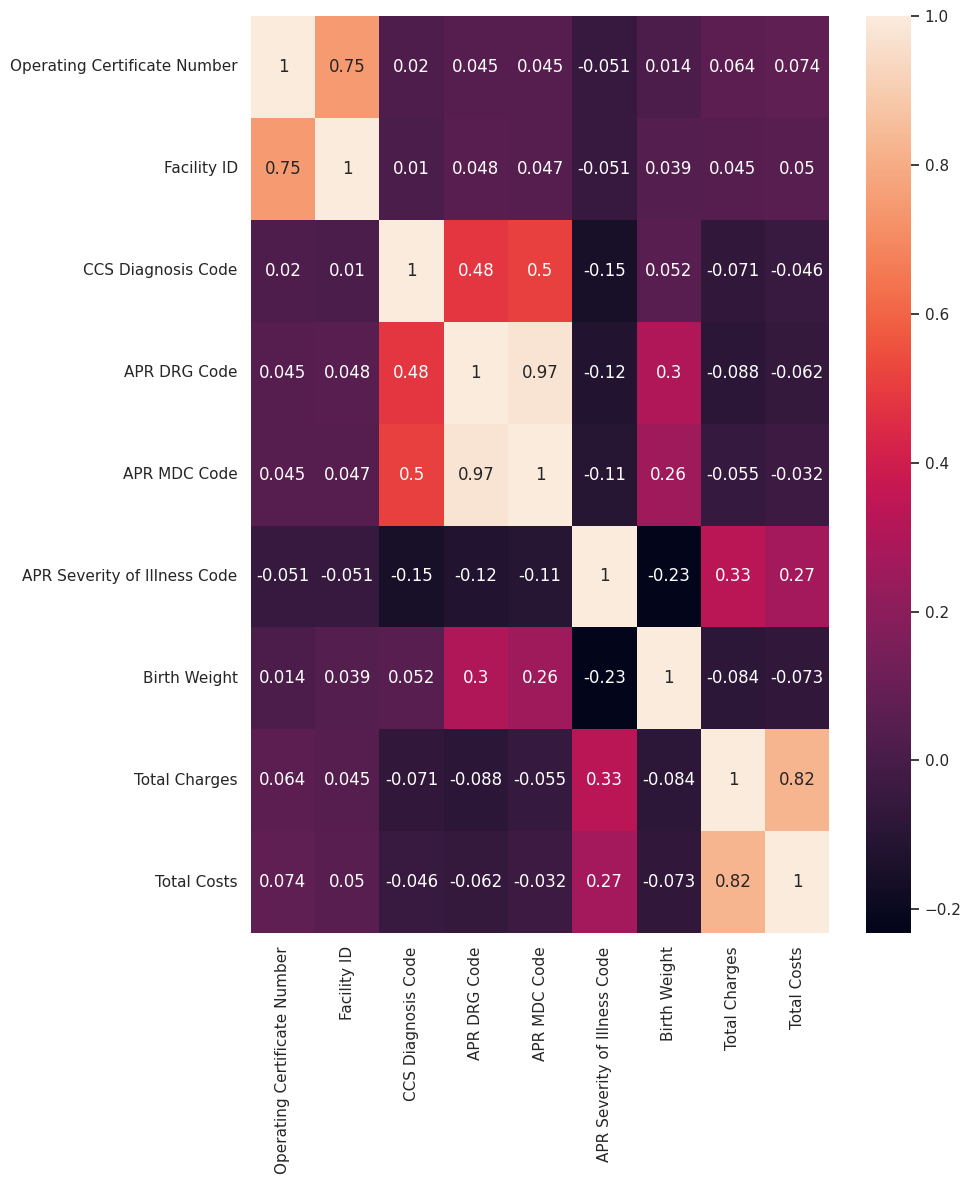

In [ ]:
plt.figure(figsize=(10, 12))
sns.heatmap(new_df_corr, annot=True);
plt.tight_layout()